# **Library Installation**

In [1]:
# Library
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Set seed
np.random.seed(42)

# **Read Data**

In [3]:
# Load dataset
df = pd.read_excel('XCleanCryptocurrencyDataset.xlsx', index_col=0)
display(df)

,full_text,processed_text,vader_sentiment
0,'Token: $GROK24 - Grok 2024 Network: Ethereum ...,token grok grok network ethereum contract xccc...,Positive
1,@metaversejoji Let's check @SolanaMono $SOL #W...,let check sol,Negative
2,"Day's DCA: $BTC, $ATOM, $DVPN, $AXL, $JKL, $HU...",day dca btc atom dvpn axl jkl huahua,Negative
3,@BorkSOL @Cerita_Crypto @solana @aeyakovenko Y...,project really amazing thats followed send please,Positive
4,👉 WL FOR .0 SOL MINT 👈 👉40 HOURS TILL SNAPSHOT...,sol mint hour till snapshot requirement join d...,Positive
...,...,...,...
9879,CyberKong VX #11328 was adopted for 0.18 $ETH...,cyberkong adopted eth blur,Negative
9880,BULLISH ON SOLANA BULLISH ON JUP BULLISH ON MA...,bullish solana bullish jup bullish madlads,Negative
9881,@naija_bitcoin 🍿🍿🍿🍿🍿 rd to 3k before valentine...,valentine,Negative
9882,Binance Futures #KLAY/ #USDT Take-Profit targe...,binance future takeprofit target profit period...,Positive


# **Data Splitting**

In [4]:
# # Asumsikan df adalah DataFrame Anda yang sudah dimuat
# X = df['processed_text']  # Kolom teks yang sudah diproses
# y = df['vader_sentiment']  # Target/Label

# # Encoding target
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y_categorical = to_categorical(y_encoded)

# # Tokenisasi dan pembuatan sequences
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X)
# sequences = tokenizer.texts_to_sequences(X)
# X_padded = pad_sequences(sequences, maxlen=1000)  # Sesuaikan maxlen sesuai dengan kebutuhan default:100

# # Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# # Batasan feature selection
# dim = X_train.shape[1]  # Jumlah token maksimal dalam sequences
# lb = [0] * dim
# ub = [1] * dim

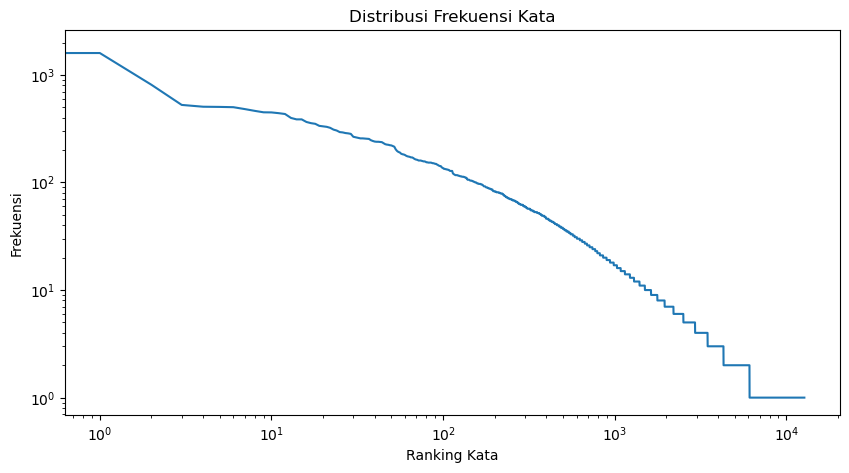

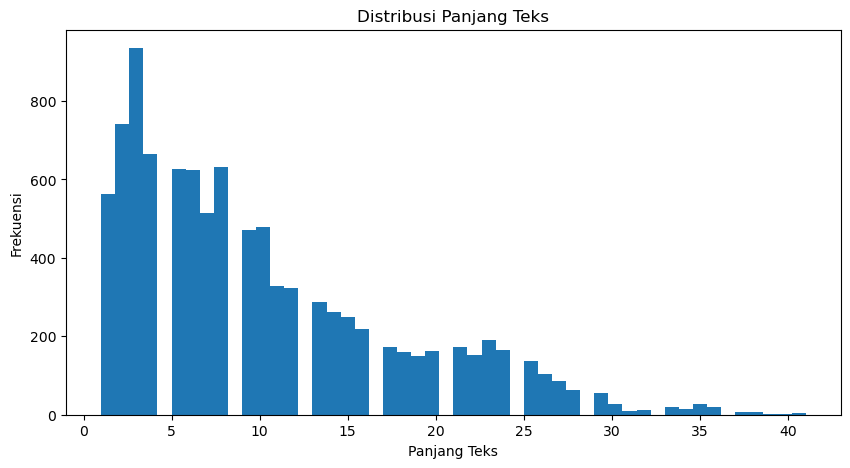

In [4]:
import matplotlib.pyplot as plt
# Asumsikan df adalah DataFrame Anda yang sudah dimuat
X = df['processed_text']  # Kolom teks yang sudah diproses
y = df['vader_sentiment']  # Target/Label

# Encoding target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Analisis Frekuensi Kata
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Plot distribusi frekuensi kata
plt.figure(figsize=(10, 5))
plt.loglog([x[1] for x in sorted_word_counts])  # Log-log plot
plt.ylabel('Frekuensi')
plt.xlabel('Ranking Kata')
plt.title('Distribusi Frekuensi Kata')
plt.show()

# Tentukan num_words
cumulative_coverage = np.cumsum([x[1] for x in sorted_word_counts]) / sum(word_counts.values())
num_words = np.searchsorted(cumulative_coverage, 0.95) + 1  # Misal, menutupi 95% frekuensi total

# Analisis Panjang Teks
text_lengths = [len(text.split()) for text in X]
plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=50)
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks')
plt.show()

# Tentukan maxlen
maxlen = np.percentile(text_lengths, 95)  # Misal, persentil ke-95

# Tokenisasi dan pembuatan sequences
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=int(maxlen))  # Sesuaikan maxlen sesuai dengan kebutuhan default:100

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# Batasan feature selection
dim = X_train.shape[1]  # Jumlah token maksimal dalam sequences
lb = [0] * dim
ub = [1] * dim

In [5]:
# Asumsikan y adalah target/label Anda
y = df['vader_sentiment']  # Contoh target/Label

# Encoding target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menampilkan label kelas dan encoding-nya
labels = label_encoder.classes_
print("Label kelas dan encoding-nya:")
for i, label in enumerate(labels):
    print(f"Kelas {i}: {label}")

Label kelas dan encoding-nya:
Kelas 0: Negative
Kelas 1: Positive


In [7]:
# # Assuming df is your loaded DataFrame
# X = df['processed_text']  # Preprocessed text column
# y = df['vader_sentiment']  # Target/Label

# # Encoding the target
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y_categorical = to_categorical(y_encoded)

# # Apply TF-IDF encoding instead of tokenization and padding
# tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
# X_tfidf = tfidf_vectorizer.fit_transform(X).toarray()

# # Splitting data
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_categorical, test_size=0.2, random_state=42)

# # Since TF-IDF produces a dense matrix of features, we adjust the feature selection bounds accordingly
# dim = X_train.shape[1]  # The new dimension is the number of features from TF-IDF
# lb = [0] * dim  # Lower bound for each feature
# ub = [1] * dim  # Upper bound for each feature

# **Feature Selection**

# Particle Swarm Optimization (PSO)

In [6]:
def pso(lb, ub, ieqcons=[], f_ieqcons=None, args=(), kwargs={}, swarmsize=100, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-8, minfunc=1e-8, debug=False):
    """
    Perform a particle swarm optimization (PSO) without an external objective function.

    Parameters:
    - lb: lower bounds of the design variables
    - ub: upper bounds of the design variables
    - ieqcons: list of inequality constraint functions (optional)
    - f_ieqcons: function returning a list of inequality constraints (optional)
    - args: additional arguments passed to the internal evaluation function
    - kwargs: additional keyword arguments passed to the internal evaluation function
    - swarmsize: number of particles in the swarm
    - omega: particle velocity scaling factor
    - phip: scaling factor to search away from the particle's best known position
    - phig: scaling factor to search away from the swarm's best known position
    - maxiter: maximum number of iterations
    - minstep: minimum step size of swarm's best position before the search terminates
    - minfunc: minimum change of swarm's best objective value before the search terminates
    - debug: if True, progress statements will be displayed every iteration

    Returns:
    - g: the swarm's best known position (optimal design)
    - f: the objective value at g
    """
    dim = len(lb)
    # Initialize the particle positions and their velocities
    positions = np.random.uniform(low=lb, high=ub, size=(swarmsize, dim))
    velocities = np.zeros((swarmsize, dim))
    # Initialize the global and local best positions
    personal_best_positions = positions.copy()
    personal_best_values = np.array([np.inf for _ in range(swarmsize)])
    global_best_value = np.inf
    global_best_position = None

    def evaluate(position):
        # Define the objective directly inside PSO. For demonstration, using sum of squares.
        return np.sum(position**2)

    for iteration in range(maxiter):
        # Update velocities and positions
        for i in range(swarmsize):
            r_p, r_g = np.random.rand(dim), np.random.rand(dim)
            velocities[i] = omega * velocities[i] + \
                            phip * r_p * (personal_best_positions[i] - positions[i]) + \
                            phig * r_g * (global_best_position - positions[i]) if global_best_position is not None else 0
            positions[i] += velocities[i]
            positions[i] = np.clip(positions[i], lb, ub)  # Keep within bounds

            # Evaluate the fitness directly without an external function
            value = evaluate(positions[i])
            # Update the personal best
            if value < personal_best_values[i]:
                personal_best_positions[i] = positions[i]
                personal_best_values[i] = value
            # Update the global best
            if value < global_best_value:
                global_best_position = positions[i]
                global_best_value = value

        if debug:
            print(f"Iteration {iteration}: Best Value = {global_best_value}")

        # Check for early stopping criteria
        if np.abs(global_best_value - personal_best_values.min()) < minfunc or np.linalg.norm(velocities.max()) < minstep:
            break

    return global_best_position, global_best_value

In [28]:
# Calling the modified PSO function
best_pos_pso, best_val_pso = pso(lb=lb, ub=ub, swarmsize=15, maxiter=50)  # Kurangi untuk kecepatan

print(f"Optimal Position: {best_pos_pso}")
print(f"Objective Value at Optimal Position: {best_val_pso}")

Optimal Position: [0.7235086  0.08812955 0.67256118 0.48691766 0.14415344 0.46265043
 0.24170322 0.3692515  0.52922555 0.21763496 0.11817568 0.10101554
 0.12555874 0.0590859  0.60681614 0.12050355 0.85040279 0.88287071
 0.63470967 0.15672676 0.71807026 0.3875604  0.43986151 0.60267089
 0.31127805]
Objective Value at Optimal Position: 5.653346544976379


# Ant Colony Optimization (ACO)

In [8]:
def aco(lb, ub, ants=100, maxiter=100, alpha=1.0, beta=2.0, evaporation_rate=0.5, pheromone_deposit=0.1, debug=False):
    """
    Perform an Ant Colony Optimization (ACO) without an external objective function.

    Parameters:
    - lb: The lower bounds of the design variable(s)
    - ub: The upper bounds of the design variable(s)
    - ants: The number of ants in the colony (Default: 100)
    - maxiter: The maximum number of iterations (Default: 100)
    - alpha: Relative importance of pheromone (Default: 1.0)
    - beta: Relative importance of heuristic information (Default: 2.0)
    - evaporation_rate: Rate at which pheromone evaporates (Default: 0.5)
    - pheromone_deposit: Amount of pheromone deposited by ants (Default: 0.1)
    - debug: If True, progress statements will be displayed (Default: False)

    Returns:
    - The best known position and objective value
    """
    dim = len(lb)
    pheromone_levels = np.ones((ants, dim))
    best_val = np.inf
    best_pos = None

    def evaluate(position):
        # Define the objective directly inside ACO. For demonstration, using sum of squares.
        return np.sum(position**2)

    # Main ACO loop
    for iteration in range(maxiter):
        positions = np.random.uniform(low=lb, high=ub, size=(ants, dim))
        for ant in range(ants):
            val = evaluate(positions[ant])  # Use the internal evaluate function
            if val < best_val:
                best_val = val
                best_pos = positions[ant]

            # Update pheromones
            pheromone_levels[ant] += pheromone_deposit

        # Evaporate pheromones
        pheromone_levels *= (1 - evaporation_rate)

        if debug:
            print(f"Iteration {iteration}: Best Value = {best_val}")

    return best_pos, best_val

In [9]:
# Calling the modified PSO function
best_pos_aco, best_val_aco = aco(lb=lb, ub=ub, ants=15, maxiter=50)

print(f"Optimal Position: {best_pos_aco}")
print(f"Objective Value at Optimal Position: {best_val_aco}")

Optimal Position: [0.60065107 0.74359392 0.50626606 0.63410403 0.07093222 0.25439158
 0.36185309 0.47249336 0.04564875 0.1400241  0.27681431 0.97153269
 0.33134701 0.48204106 0.19609771 0.61078007 0.28068322 0.20699258
 0.51657263 0.0055058  0.00766403 0.21906881 0.03672136 0.10802575
 0.33886065]
Objective Value at Optimal Position: 4.356295495629194


# Cat Swarm Optimization (CSO)

In [10]:
def cso(lb, ub, cats=100, maxiter=100, mix_rate=0.5, seeking_memory_pool=5, seeking_range_of_selected_dimension=0.2, counts_of_dimension_to_change=2, debug=False):
    """
    Perform a Cat Swarm Optimization (CSO) without an external objective function.

    Parameters:
    - lb: The lower bounds of the design variable(s)
    - ub: The upper bounds of the design variable(s)
    - cats: The number of cats in the swarm (Default: 100)
    - maxiter: The maximum number of iterations (Default: 100)
    - mix_rate: Mixture rate to switch between seeking and tracing modes (Default: 0.5)
    - seeking_memory_pool: Size of memory pool in seeking mode (Default: 5)
    - seeking_range_of_selected_dimension: Range of selected dimension in seeking mode (Default: 0.2)
    - counts_of_dimension_to_change: Number of dimensions to change in seeking mode (Default: 2)
    - debug: If True, progress statements will be displayed (Default: False)

    Returns:
    - The best known position and objective value
    """
    dim = len(lb)
    best_val = np.inf
    best_pos = None
    positions = np.random.uniform(low=lb, high=ub, size=(cats, dim))

    def evaluate(position):
        # Define the objective directly inside CSO. For demonstration, using sum of squares.
        return np.sum(position**2)

    # Main CSO loop
    for iteration in range(maxiter):
        for cat in range(cats):
            if np.random.rand() < mix_rate:
                # Seeking mode
                for _ in range(seeking_memory_pool):
                    candidate_position = positions[cat] + np.random.uniform(-1, 1, size=dim) * seeking_range_of_selected_dimension
                    candidate_position = np.clip(candidate_position, lb, ub)
                    val = evaluate(candidate_position)  # Use the internal evaluate function
                    if val < best_val:
                        best_val = val
                        best_pos = candidate_position
            else:
                # Tracing mode (simplified as random walk in this example)
                positions[cat] += np.random.uniform(-1, 1, size=dim)
                positions[cat] = np.clip(positions[cat], lb, ub)
                val = evaluate(positions[cat])  # Use the internal evaluate function
                if val < best_val:
                    best_val = val
                    best_pos = positions[cat]

        if debug:
            print(f"Iteration {iteration}: Best Value = {best_val}")

    return best_pos, best_val

In [11]:
best_pos_cso, best_val_cso = cso(lb=lb, ub=ub, cats=15, maxiter=50)

print(f"Optimal Position: {best_pos_cso}")
print(f"Objective Value at Optimal Position: {best_val_cso}")

Optimal Position: [0.01024624 0.75670209 0.82309118 0.         0.         0.42836077
 0.         0.42499585 0.         0.06602555 0.06087631 0.
 0.16769662 0.20335766 0.07333386 0.99433989 0.1478437  0.17232111
 0.12705389 0.23508414 0.         0.         0.33389725 0.14454
 0.21316445]
Objective Value at Optimal Position: 2.98670585962108


# **Modeling**

In [12]:
def create_lstm_model(input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=num_words, output_dim=300, input_length=input_length),
        LSTM(256, dropout=0.2, recurrent_dropout=0.2),
        Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid') # Gunakan 'sigmoid' untuk binary, 'softmax' untuk multiclass
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy']) # Sesuaikan loss function
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

# LSTM

In [13]:
model_lstm = create_lstm_model(X_train.shape[1], y_train.shape[1])

start_time_lstm = time.time()
history_lstm = model_lstm.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128)
end_time_lstm = time.time()
time_execution_lstm = end_time_lstm - start_time_lstm

# Evaluasi model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss_lstm}")
print(f"Test Accuracy: {accuracy_lstm}")
print(f"Time Execution: {time_execution_lstm}")



Epoch 1/10


50/50 [==============================] - 9s 131ms/step - loss: 0.5926 - accuracy: 0.6750 - val_loss: 0.4467 - val_accuracy: 0.8006
Epoch 2/10
50/50 [==============================] - 6s 126ms/step - loss: 0.2826 - accuracy: 0.8887 - val_loss: 0.3945 - val_accuracy: 0.8476
Epoch 3/10
50/50 [==============================] - 6s 125ms/step - loss: 0.1251 - accuracy: 0.9611 - val_loss: 0.4265 - val_accuracy: 0.8521
Epoch 4/10
50/50 [==============================] - 6s 120ms/step - loss: 0.0599 - accuracy: 0.9829 - val_loss: 0.5048 - val_accuracy: 0.8616
Epoch 5/10
50/50 [==============================] - 6s 124ms/step - loss: 0.0338 - accuracy: 0.9921 - val_loss: 0.5122 - val_accuracy: 0.8489
Epoch 6/10
50/50 [==============================] - 6s 122ms/step - loss: 0.0394 - accuracy: 0.9887 - val_loss: 0.6601 - val_accuracy: 0.8444
Epoch 7/10
50/50 [==============================] - 6s 123ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.7040 - val_accuracy: 0.8368
Ep

62/62 [==============================] - 1s 13ms/step


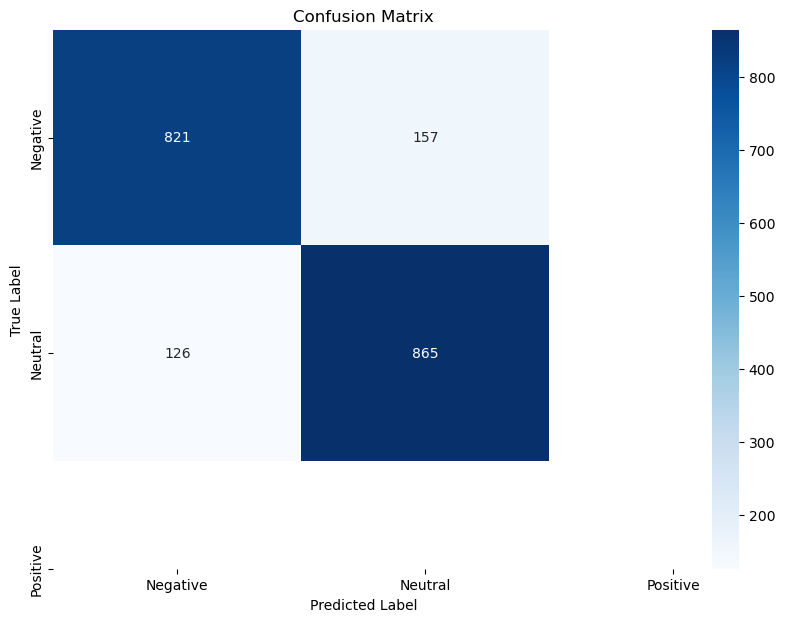


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       978
           1       0.85      0.87      0.86       991

    accuracy                           0.86      1969
   macro avg       0.86      0.86      0.86      1969
weighted avg       0.86      0.86      0.86      1969



In [14]:
# Lakukan prediksi
predictions = model_lstm.predict(X_test)
# Ubah prediksi dari one-hot encoding ke label kelas menggunakan numpy
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# PSO-LSTM

In [15]:
# Asumsikan best_weights sudah ada
selected_indices_pso = np.where(best_pos_pso > 0.5)[0]  # Ambil indeks dengan bobot > 0.5

# Memfilter X_train dan X_test berdasarkan fitur terpilih
X_train_selected_pso = X_train[:, selected_indices_pso]
X_test_selected_pso = X_test[:, selected_indices_pso]

model_pso_lstm = create_lstm_model(X_train_selected_pso.shape[1], y_train.shape[1])

start_time_pso_lstm = time.time()
history_pso_lstm = model_pso_lstm.fit(X_train_selected_pso, y_train, validation_split=0.2, epochs=10, batch_size=128)
end_time_pso_lstm = time.time()
time_execution_pso_lstm = end_time_pso_lstm - start_time_pso_lstm

# Evaluasi model
loss_pso_lstm, accuracy_pso_lstm = model_pso_lstm.evaluate(X_test_selected_pso, y_test)
print(f"Test Loss: {loss_pso_lstm}")
print(f"Test Accuracy: {accuracy_pso_lstm}")
print(f"Time Execution: {time_execution_pso_lstm}")

Epoch 1/10
50/50 [==============================] - 6s 68ms/step - loss: 0.6466 - accuracy: 0.6299 - val_loss: 0.5917 - val_accuracy: 0.6844
Epoch 2/10
50/50 [==============================] - 3s 63ms/step - loss: 0.5023 - accuracy: 0.7612 - val_loss: 0.5896 - val_accuracy: 0.6705
Epoch 3/10
50/50 [==============================] - 3s 64ms/step - loss: 0.4089 - accuracy: 0.8084 - val_loss: 0.7315 - val_accuracy: 0.6737
Epoch 4/10
50/50 [==============================] - 3s 62ms/step - loss: 0.3405 - accuracy: 0.8408 - val_loss: 0.7306 - val_accuracy: 0.6756
Epoch 5/10
50/50 [==============================] - 3s 62ms/step - loss: 0.3013 - accuracy: 0.8549 - val_loss: 0.7714 - val_accuracy: 0.6756
Epoch 6/10
50/50 [==============================] - 3s 62ms/step - loss: 0.2806 - accuracy: 0.8654 - val_loss: 0.8982 - val_accuracy: 0.6787
Epoch 7/10
50/50 [==============================] - 3s 63ms/step - loss: 0.2590 - accuracy: 0.8778 - val_loss: 1.0192 - val_accuracy: 0.6806
Epoch 8/10
50

62/62 [==============================] - 1s 5ms/step


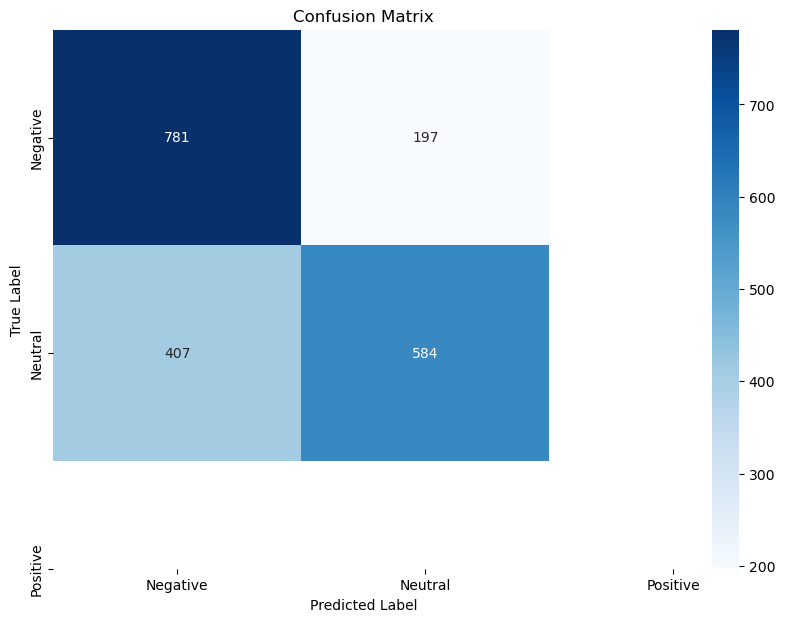


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       978
           1       0.75      0.59      0.66       991

    accuracy                           0.69      1969
   macro avg       0.70      0.69      0.69      1969
weighted avg       0.70      0.69      0.69      1969



In [16]:
# Lakukan prediksi
predictions = model_pso_lstm.predict(X_test_selected_pso)
# Ubah prediksi dari one-hot encoding ke label kelas menggunakan numpy
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# ACO-LSTM

In [17]:
# Asumsikan best_weights sudah ada
selected_indices_aco = np.where(best_pos_aco > 0.5)[0]  # Ambil indeks dengan bobot > 0.5

# Memfilter X_train dan X_test berdasarkan fitur terpilih
X_train_selected_aco = X_train[:, selected_indices_aco]
X_test_selected_aco = X_test[:, selected_indices_aco]

model_aco_lstm = create_lstm_model(X_train_selected_aco.shape[1], y_train.shape[1])

start_time_aco_lstm = time.time()
history_aco_lstm = model_aco_lstm.fit(X_train_selected_aco, y_train, validation_split=0.2, epochs=10, batch_size=128)
end_time_aco_lstm = time.time()
time_execution_aco_lstm = end_time_aco_lstm - start_time_aco_lstm

# Evaluasi model
loss_aco_lstm, accuracy_aco_lstm = model_aco_lstm.evaluate(X_test_selected_aco, y_test)
print(f"Test Loss: {loss_aco_lstm}")
print(f"Test Accuracy: {accuracy_aco_lstm}")
print(f"Time Execution: {time_execution_aco_lstm}")

Epoch 1/10
50/50 [==============================] - 5s 58ms/step - loss: 0.6521 - accuracy: 0.6271 - val_loss: 0.6247 - val_accuracy: 0.6648
Epoch 2/10
50/50 [==============================] - 3s 52ms/step - loss: 0.5659 - accuracy: 0.7092 - val_loss: 0.6026 - val_accuracy: 0.6610
Epoch 3/10
50/50 [==============================] - 3s 52ms/step - loss: 0.4751 - accuracy: 0.7665 - val_loss: 0.6552 - val_accuracy: 0.6590
Epoch 4/10
50/50 [==============================] - 3s 53ms/step - loss: 0.4318 - accuracy: 0.7785 - val_loss: 0.7286 - val_accuracy: 0.6552
Epoch 5/10
50/50 [==============================] - 2s 49ms/step - loss: 0.4036 - accuracy: 0.7901 - val_loss: 0.7772 - val_accuracy: 0.6546
Epoch 6/10
50/50 [==============================] - 2s 50ms/step - loss: 0.3911 - accuracy: 0.7966 - val_loss: 0.7818 - val_accuracy: 0.6571
Epoch 7/10
50/50 [==============================] - 2s 50ms/step - loss: 0.3796 - accuracy: 0.8036 - val_loss: 0.8984 - val_accuracy: 0.6584
Epoch 8/10
50

62/62 [==============================] - 0s 4ms/step


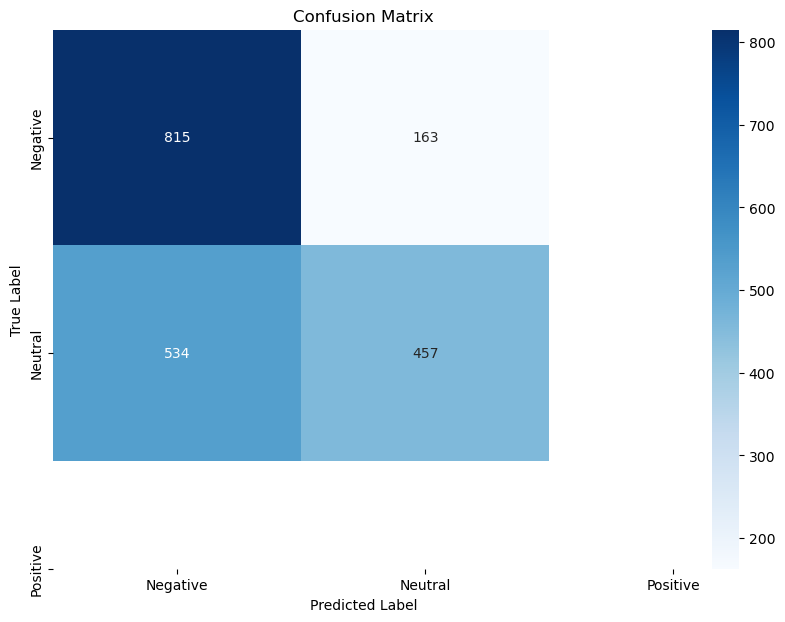


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70       978
           1       0.74      0.46      0.57       991

    accuracy                           0.65      1969
   macro avg       0.67      0.65      0.63      1969
weighted avg       0.67      0.65      0.63      1969



In [18]:
# Lakukan prediksi
predictions = model_aco_lstm.predict(X_test_selected_aco)
# Ubah prediksi dari one-hot encoding ke label kelas menggunakan numpy
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# CSO-LSTM

In [19]:
# Asumsikan best_weights sudah ada
selected_indices_cso = np.where(best_pos_cso > 0.5)[0]  # Ambil indeks dengan bobot > 0.5

# Memfilter X_train dan X_test berdasarkan fitur terpilih
X_train_selected_cso = X_train[:, selected_indices_cso]
X_test_selected_cso = X_test[:, selected_indices_cso]

model_cso_lstm = create_lstm_model(X_train_selected_cso.shape[1], y_train.shape[1])

start_time_cso_lstm = time.time()
history_cso_lstm = model_cso_lstm.fit(X_train_selected_cso, y_train, validation_split=0.2, epochs=10, batch_size=128)
end_time_cso_lstm = time.time()
time_execution_cso_lstm = end_time_cso_lstm - start_time_cso_lstm

# Evaluasi model
loss_cso_lstm, accuracy_cso_lstm = model_cso_lstm.evaluate(X_test_selected_cso, y_test)
print(f"Test Loss: {loss_cso_lstm}")
print(f"Test Accuracy: {accuracy_cso_lstm}")
print(f"Time Execution: {time_execution_cso_lstm}")

Epoch 1/10
50/50 [==============================] - 4s 39ms/step - loss: 0.6747 - accuracy: 0.5957 - val_loss: 0.6485 - val_accuracy: 0.6463
Epoch 2/10
50/50 [==============================] - 2s 34ms/step - loss: 0.6207 - accuracy: 0.6555 - val_loss: 0.6312 - val_accuracy: 0.6546
Epoch 3/10
50/50 [==============================] - 2s 34ms/step - loss: 0.5650 - accuracy: 0.7017 - val_loss: 0.6467 - val_accuracy: 0.6483
Epoch 4/10
50/50 [==============================] - 2s 34ms/step - loss: 0.5314 - accuracy: 0.7071 - val_loss: 0.6668 - val_accuracy: 0.6425
Epoch 5/10
50/50 [==============================] - 2s 34ms/step - loss: 0.5192 - accuracy: 0.7069 - val_loss: 0.6845 - val_accuracy: 0.6483
Epoch 6/10
50/50 [==============================] - 2s 35ms/step - loss: 0.5131 - accuracy: 0.7120 - val_loss: 0.6942 - val_accuracy: 0.6489
Epoch 7/10
50/50 [==============================] - 2s 35ms/step - loss: 0.5074 - accuracy: 0.7127 - val_loss: 0.6978 - val_accuracy: 0.6406
Epoch 8/10
50

62/62 [==============================] - 0s 2ms/step


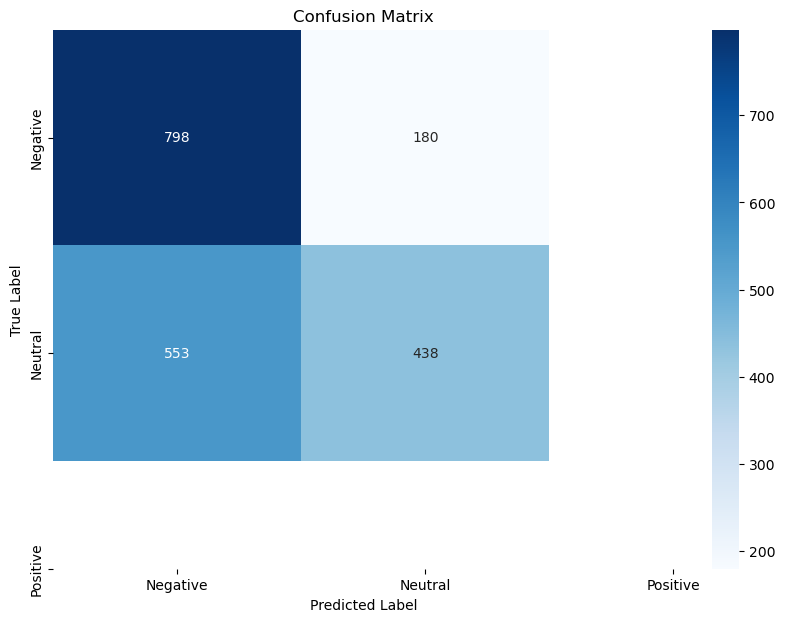


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       978
           1       0.71      0.44      0.54       991

    accuracy                           0.63      1969
   macro avg       0.65      0.63      0.61      1969
weighted avg       0.65      0.63      0.61      1969



In [20]:
# Lakukan prediksi
predictions = model_cso_lstm.predict(X_test_selected_cso)
# Ubah prediksi dari one-hot encoding ke label kelas menggunakan numpy
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

In [21]:
dim

25

In [22]:
lb

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
ub

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]